Files already downloaded and verified
Files already downloaded and verified


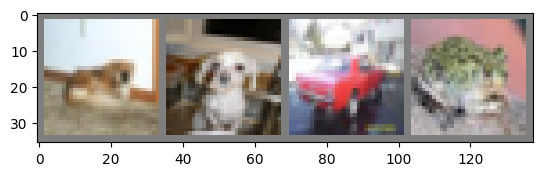

dog   dog   car   frog 


In [1]:
from model import Net, train
from data import *
from utils import imshow

In [2]:
from distributed_setup import run

model = Net()
run(model, train)

Running on  4 cuda:0
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verifiedFiles already downloaded and verified

Files already downloaded and verified
Files already downloaded and verifiedFiles already downloaded and verifiedFiles already downloaded and verified


distributed_training on: 0
distributed_training on: 1
distributed_training on: 2
distributed_training on: 3


ProcessRaisedException: 

-- Process 0 terminated with the following error:
Traceback (most recent call last):
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/multiprocessing/spawn.py", line 69, in _wrap
    fn(i, *args)
  File "/project/studios/this_studio/image_classifier/distributed_setup.py", line 30, in distributed_training
    train_fn(rank, ddp_model, optimizer, criterion)
  File "/project/studios/this_studio/image_classifier/model.py", line 60, in train
    loss = loss_fn(outputs, labels)
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/nn/modules/loss.py", line 1174, in forward
    return F.cross_entropy(input, target, weight=self.weight,
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/nn/functional.py", line 3029, in cross_entropy
    return torch._C._nn.cross_entropy_loss(input, target, weight, _Reduction.get_enum(reduction), ignore_index, label_smoothing)
RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument target in method wrapper_CUDA_nll_loss_forward)


In [ ]:
PATH = './cifar_net_gpu.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

In [ ]:
test(device)